<a href="https://colab.research.google.com/github/tutalae/ralph-vince-money-risk/blob/main/ralph_vince_money_risk_chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1

## Optimal f.

In [ ]:
def calculate_f(account_size, worst_case_loss_per_contract, num_contracts):
    divisor = worst_case_loss_per_contract / ( account_size / num_contracts )
    return divisor

# Example usage
account_size = 100
worst_case_loss_per_contract = 1
num_contracts = 25

f = calculate_f(account_size, worst_case_loss_per_contract, num_contracts)
print(f)

0.25


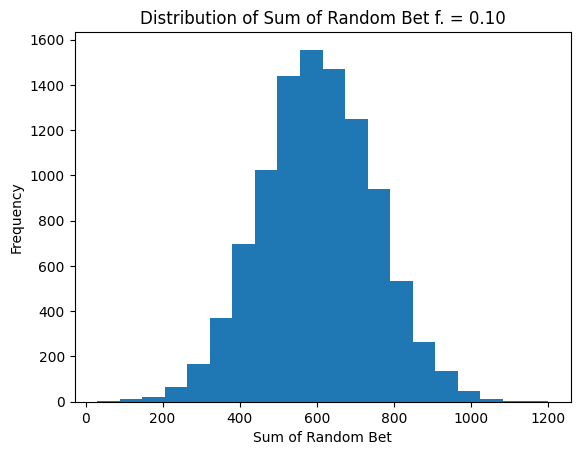

min: 30
max: 1200


In [ ]:
import random
import matplotlib.pyplot as plt

number_of_contract = 10
my_list = [-1, 2]
my_list = [number_of_contract * element for element in my_list]
number_of_play = 100
sum_of_random_elements_list = []

number_of_experiment = 10000

sum_min = 100
sum_max = 100

for _ in range(number_of_experiment):
    sum_of_random_elements = 100
    for _ in range(number_of_play):
        random_element = random.choice(my_list)
        sum_of_random_elements += random_element
    sum_of_random_elements_list.append(sum_of_random_elements)

    if sum_of_random_elements < sum_min:
      sum_min = sum_of_random_elements
    if sum_of_random_elements > sum_max:
      sum_max = sum_of_random_elements

plt.hist(sum_of_random_elements_list, bins=20)
plt.xlabel('Sum of Random Bet')
plt.ylabel('Frequency')
plt.title('Distribution of Sum of Random Bet f. = 0.10')
plt.show()

print('min:', sum_min)
print('max:', sum_max)

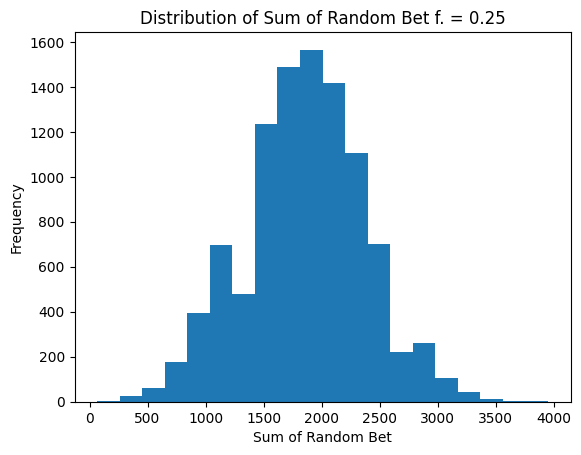

min: 65
max: 3950


In [ ]:
import random
import matplotlib.pyplot as plt

number_of_contract = 35
my_list = [-1, 2]
my_list = [number_of_contract * element for element in my_list]
number_of_play = 100
sum_of_random_elements_list = []

number_of_experiment = 10000

sum_min = 100
sum_max = 100

for _ in range(number_of_experiment):
    sum_of_random_elements = 100
    for _ in range(number_of_play):
        random_element = random.choice(my_list)
        sum_of_random_elements += random_element
    sum_of_random_elements_list.append(sum_of_random_elements)

    if sum_of_random_elements < sum_min:
      sum_min = sum_of_random_elements
    if sum_of_random_elements > sum_max:
      sum_max = sum_of_random_elements

plt.hist(sum_of_random_elements_list, bins=20)
plt.xlabel('Sum of Random Bet')
plt.ylabel('Frequency')
plt.title('Distribution of Sum of Random Bet f. = 0.25')
plt.show()

print('min:', sum_min)
print('max:', sum_max)

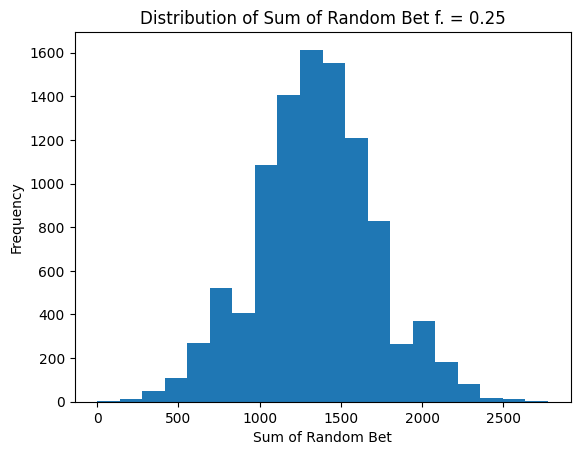

min: 0
max: 2775


In [ ]:
import random
import matplotlib.pyplot as plt

number_of_contract = 25
my_list = [-1, -1, -1, -1, -1, 2, 2, 2, 2, 2]
my_list = [number_of_contract * element for element in my_list]
number_of_play = 100
sum_of_random_elements_list = []

number_of_experiment = 10000

sum_min = 100
sum_max = 100

for _ in range(number_of_experiment):
    sum_of_random_elements = 100
    for _ in range(number_of_play):
        random_element = random.choice(my_list)
        sum_of_random_elements += random_element
    sum_of_random_elements_list.append(sum_of_random_elements)

    if sum_of_random_elements < sum_min:
      sum_min = sum_of_random_elements
    if sum_of_random_elements > sum_max:
      sum_max = sum_of_random_elements

plt.hist(sum_of_random_elements_list, bins=20)
plt.xlabel('Sum of Random Bet')
plt.ylabel('Frequency')
plt.title('Distribution of Sum of Random Bet f. = 0.25')
plt.show()

print('min:', sum_min)
print('max:', sum_max)

## z-score

In [ ]:
import math

def runs_test(trade_record):
  N = len(trade_record)
  W = 0
  R = 0
  sign = None
  for i in trade_record:
    i_sign = None

    if i <= 0:
      i_sign = -1
    else:
      i_sign = 1
      W += 1

    if sign != i_sign:
      R += 1
      sign = i_sign

  L = N - W
  X = 2 * W * L

  # Calculate Z-score
  Z_score = (1.01 * (N * (R - 0.5) - X)) / math.sqrt(X * (X - N) / (N - 1))

  # Calculate confidence limit (using normalcdf function from SciPy)
  from scipy.stats import norm
  confidence_limit = 100 * (1 - norm.cdf(abs(Z_score))) * 2

  # Return results
  return {
      "N": N,
      "R": R,
      "X": X,
      "Z_score": Z_score,
      "confidence_limit": confidence_limit
  }

trade_record = [-3, 2, 7, -4, 1, -1, 1, 6, -1, 0, -2, 1]
results = runs_test(trade_record)

print("Trade record:", trade_record)
print("Total trades:", results["N"])
print("Number of runs:", results["R"])
print("Z-score:", results["Z_score"])
print("Confidence limit:", results["confidence_limit"], "%")


Trade record: [-3, 2, 7, -4, 1, -1, 1, 6, -1, 0, -2, 1]
Total trades: 12
Number of runs: 8
Z-score: 0.91737805729154
Confidence limit: 35.89445669460862 %


In [ ]:
trade_record = [-3, -2, -7, -4, 1, 1, 1, 6, -1, 0, -2, 1, 1, 1, 1, 1, 1, 1]
results = runs_test(trade_record)

print("Trade record:", trade_record)
print("Total trades:", results["N"])
print("Number of runs:", results["R"])
print("Z-score:", results["Z_score"])
print("Confidence limit:", results["confidence_limit"], "%")

Trade record: [-3, -2, -7, -4, 1, 1, 1, 6, -1, 0, -2, 1, 1, 1, 1, 1, 1, 1]
Total trades: 18
Number of runs: 4
Z-score: -2.6185291456013307
Confidence limit: 0.8830974731665275 %


In [ ]:
trade_record = [-3, 2, -7, 4, -1, 1, -1, 6, -1, 0, -2, 1, -1, 1, -1, 1, -1, 1]
results = runs_test(trade_record)

print("Trade record:", trade_record)
print("Total trades:", results["N"])
print("Number of runs:", results["R"])
print("Z-score:", results["Z_score"])
print("Confidence limit:", results["confidence_limit"], "%")

Trade record: [-3, 2, -7, 4, -1, 1, -1, 6, -1, 0, -2, 1, -1, 1, -1, 1, -1, 1]
Total trades: 18
Number of runs: 16
Z-score: 3.287673131118339
Confidence limit: 0.10101905372028597 %


##  Correlations


$$
r = \frac{\sum\limits_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})} {\sqrt{\sum\limits_{i=1}^{n} (x_i - \bar{x})^2 \sum\limits_{i=1}^{n} (y_i - \bar{y})^2}}
$$


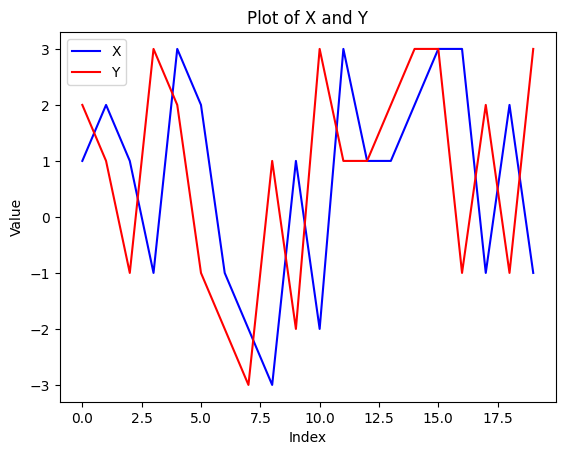

In [ ]:
import matplotlib.pyplot as plt

# Define the data
X = [1, 2, 1, -1, 3, 2, -1, -2, -3, 1, -2, 3, 1, 1, 2, 3, 3, -1, 2, -1]
Y = [2, 1, -1, 3, 2, -1, -2, -3, 1, -2, 3, 1, 1, 2, 3, 3, -1, 2, -1, 3]

# Plot X and Y on the same plot
plt.plot(X, label='X', color='blue')
plt.plot(Y, label='Y', color='red')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of X and Y')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Define the data
X = [1, 2, 1, -1, 3, 2, -1, -2, -3, 1, -2, 3, 1, 1, 2, 3, 3, -1, 2, -1]
Y = [2, 1, -1, 3, 2, -1, -2, -3, 1, -2, 3, 1, 1, 2, 3, 3, -1, 2, -1, 3]

# Calculate the mean of X and Y
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Create a pandas DataFrame
data = pd.DataFrame({
  "X": X,
  "Y": Y
})

# Calculate deviations from the mean
data["X - x̄"] = data["X"] - mean_X
data["Y - ȳ"] = data["Y"] - mean_Y

x_after = sum(data["X - x̄"])
y_after = sum(data["Y - ȳ"])

# Calculate product of deviations
data["(X - x̄) * (Y - ȳ)"] = data["X - x̄"] * data["Y - ȳ"]

# Calculate the sum of products of deviations
sum_product_deviations = (data["X - x̄"] * data["Y - ȳ"]).sum()

# Calculate the squared deviations (not shown in the table)
squared_deviations_X = np.sum((data["X"] - mean_X) ** 2)
squared_deviations_Y = np.sum((data["Y"] - mean_Y) ** 2)

# Calculate the correlation coefficient (not shown in the table)
correlation_coefficient = sum_product_deviations / (np.sqrt(squared_deviations_X) * np.sqrt(squared_deviations_Y))

# Add squared deviations to the DataFrame
data["(X - x̄)²"] = (data["X - x̄"]) ** 2
data["(Y - ȳ)²"] = (data["Y - ȳ"]) ** 2
data["(X - x̄)² * (Y - ȳ)²"] = data["(X - x̄)²"] * data["(Y - ȳ)²"]

data

,X,Y,X - x̄,Y - ȳ,(X - x̄) * (Y - ȳ),(X - x̄)²,(Y - ȳ)²,(X - x̄)² * (Y - ȳ)²
0,1,2,0.3,1.2,0.36,0.09,1.44,0.1296
1,2,1,1.3,0.2,0.26,1.69,0.04,0.0676
2,1,-1,0.3,-1.8,-0.54,0.09,3.24,0.2916
3,-1,3,-1.7,2.2,-3.74,2.89,4.84,13.9876
4,3,2,2.3,1.2,2.76,5.29,1.44,7.6176
5,2,-1,1.3,-1.8,-2.34,1.69,3.24,5.4756
6,-1,-2,-1.7,-2.8,4.76,2.89,7.84,22.6576
7,-2,-3,-2.7,-3.8,10.26,7.29,14.44,105.2676
8,-3,1,-3.7,0.2,-0.74,13.69,0.04,0.5476
9,1,-2,0.3,-2.8,-0.84,0.09,7.84,0.7056


In [ ]:

# Display the sum of products of deviations
print(f"\nSum of (X - x̄) * (Y - ȳ): = {sum_product_deviations:.2f}")

# Display the sum of squared deviations
print(f"\nSum of sum((X - X̄)²) and sum((Y - Ȳ)²): {(np.sum(data['(X - x̄)²'] * data['(Y - ȳ)²'])):.2f}")

# Display the product of the square roots of the squared deviations
print(f"\nProduct of square roots of sum((X - X̄)²) * sum((Y - Ȳ)²): {(np.sqrt(np.sum(data['(X - x̄)²']) * np.sum(data['(Y - ȳ)²']))):.2f}")

# Display the correlation coefficient
print(f"\nCorrelation coefficient: r = sum((X - X̄) * (Y - Ȳ)) / sqrt(sum((X - X̄)²) * sum((Y - Ȳ)²)) = {sum_product_deviations} / {(np.sqrt(squared_deviations_X) * np.sqrt(squared_deviations_Y))} = {correlation_coefficient}")



Sum of (X - x̄) * (Y - ȳ): = 0.80

Sum of sum((X - X̄)²) and sum((Y - Ȳ)²): 266.92

Product of square roots of sum((X - X̄)²) * sum((Y - Ȳ)²): 70.66

Correlation coefficient: r = sum((X - X̄) * (Y - Ȳ)) / sqrt(sum((X - X̄)²) * sum((Y - Ȳ)²)) = 0.7999999999999972 / 70.65578532576085 = 0.011322498169280415


In [ ]:
import math

def fishers_z_transform(r, N):
    """
    Fisher's Z transformation
    :param r: correlation coefficient
    :param N: number of elements in the sample
    :return: transformed variable
    """
    return (0.5 * math.log((1 + r) / (1 - r))) / (1 / (N - 3))**0.5

r = correlation_coefficient
N = len(X)

print(f"r : {r}, N : {N}")
print(fishers_z_transform(r, N))

r : 0.011322498169280415, N : 20
0.04668585099193543


## Fisher\'s Z Transformation Distribution

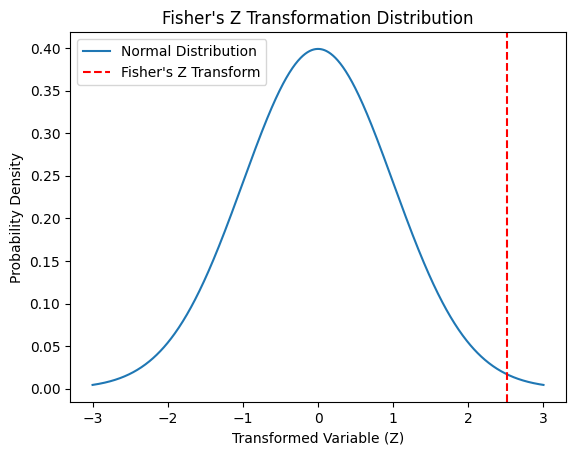

In [ ]:
# Calculate the transformed variable
Z = fishers_z_transform(0.25, 100)

# Create a range of values for the transformed variable
z_values = np.linspace(-3, 3, 1000)

# Calculate the probability density function for the transformed variable
pdf_values = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * z_values**2)


# Plot the distribution
plt.plot(z_values, pdf_values, label='Normal Distribution')
plt.axvline(x=Z, color='red', linestyle='--', label='Fisher\'s Z Transform')

# Add labels and title
plt.xlabel('Transformed Variable (Z)')
plt.ylabel('Probability Density')
plt.title('Fisher\'s Z Transformation Distribution')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## confidence limit

In [ ]:
print("Z =", Z)

import scipy.stats as stats

# Calculate the confidence limit
confidence_limit = (1 - stats.norm.cdf(Z)) * 100

# Print the confidence limit
print(f"Confidence Limit = {confidence_limit:.2f}%")


Z = 2.5155244649925197
Confidence Limit = 0.59%


In [ ]:
from scipy.stats import norm

def calculate_confidence_level(z_score):
  """
  Calculates the two-tailed confidence level based on a z-score in a standard normal distribution.

  Args:
      z_score: The z-score value.

  Returns:
      The two-tailed confidence level as a decimal between 0 and 1.
  """

  # Get the cumulative probability (area to the left of the z-score)
  cumulative_probability = norm.cdf(z_score)

  # Calculate the two-tailed confidence level
  confidence_level = 2 * (1 - cumulative_probability)

  return confidence_level

# Example usage
z_score = 2.515523856  # Replace with your actual z-score
confidence_level = calculate_confidence_level(z_score)

print(f"Confidence level: {1-confidence_level:.4f}")


Confidence level: 0.9881


## reinvest trading profit or not?

In [239]:
def calculate_cumulative_pl(pl_list):
  """
  This function calculates the cumulative P&L for a series of trades.

  Args:
      pl_list: A list of P&L values (floats representing profit or loss).

  Returns:
      A list of cumulative P&L values corresponding to the input P&L list.
  """
  cumulative_pl = []
  total_pl = 100
  for pl in pl_list:
    total_pl += pl
    cumulative_pl.append(total_pl)
  return cumulative_pl

def calculate_cumulative_reinvest_pl(pl_list):
  """
  This function calculates the cumulative P&L for a series of trades.

  Args:
      pl_list: A list of P&L values (floats representing profit or loss).

  Returns:
      A list of cumulative P&L values corresponding to the input P&L list.
  """
  cumulative_pl = []
  reinvest_pl_list = []
  total_pl = 100
  for pl in pl_list:
    reinvest_pl_list.append((pl*total_pl)/100)
    total_pl += (pl*total_pl)/100
    cumulative_pl.append(total_pl)
  return cumulative_pl, reinvest_pl_list

def find_risk_reward(numbers):
    sum_positive = sum(x for x in numbers if x > 0)
    sum_negative = sum(x for x in numbers if x < 0)

    if sum_negative == 0:
        return np.inf  # Return infinity if there are no negative values

    return abs(sum_positive / sum_negative)

# Example usage
pl_list = [50, -40, 1, 1]  # Sample P&L list
cumulative_pl = calculate_cumulative_pl(pl_list)
cumulative_reinvest_pl = calculate_cumulative_reinvest_pl(pl_list)

print("System A:")
print("P&L:", pl_list)
print("Cumulative P&L:", cumulative_pl)

# 1. Calculate total number of trades
total_trades = len(pl_list)

# 2. Calculate number of winning trades
winning_trades = sum(1 for pl in pl_list if pl > 0)

# 3. Calculate percentage of winning trades
percentage_winning_trades = (winning_trades / total_trades) * 100

# 4. Calculate average trade
average_trade = np.mean(pl_list)

# 5. Calculate risk-to-reward ratio
risk_to_reward = -np.mean([pl for pl in pl_list if pl < 0]) / np.mean([pl for pl in pl_list if pl > 0])

# 6. Calculate standard deviation
std_dev = np.std(pl_list)

# 7. Calculate average trade divided by standard deviation
avg_trade_std_dev = average_trade / std_dev

# Output the results
print("Percentage of Wins: {:.2f}%".format(percentage_winning_trades))
print("Avg. Trade: {:.5f}".format(average_trade))
print("Risk/Rew.: {:.2f}".format(find_risk_reward(pl_list)))
print("Std. Dev.: {:.2f}".format(std_dev))
print("Avg. Trade/Std. Dev.: {:.2f}".format(avg_trade_std_dev))

print("-"*40)

import numpy as np

print("System A reinvest:")
print("P&L:", pl_list, " >>>>> ", "reinvest P&L:", cumulative_reinvest_pl[1])
print("reinvest Cumulative P&L:", cumulative_reinvest_pl[0])

pl_list = cumulative_reinvest_pl[1]

# 1. Calculate total number of trades
total_trades = len(pl_list)

# 2. Calculate number of winning trades
winning_trades_reinvest = sum(1 for pl in pl_list if pl > 0)

# 3. Calculate percentage of winning trades
percentage_winning_trades_reinvest = (winning_trades_reinvest / total_trades) * 100

# 4. Calculate average trade
average_trade_reinvest = np.mean(pl_list)

# 5. Calculate risk-to-reward ratio
risk_to_reward_reinvest = -np.mean([pl for pl in pl_list if pl < 0]) / np.mean([pl for pl in pl_list if pl > 0])
# -sum(pl for pl in pl_values if pl < 0) / sum(pl for pl in pl_values if pl > 0) if sum(pl for pl in pl_values if pl > 0) != 0 else 0

# 6. Calculate standard deviation
std_dev_reinvest = np.std(pl_list)

# 7. Calculate average trade divided by standard deviation
avg_trade_std_dev_reinvest = average_trade_reinvest / std_dev_reinvest

# Output the results
print("Percentage of Wins (reinvest): {:.2f}%".format(percentage_winning_trades_reinvest))
print("Avg. Trade (reinvest): {:.5f}".format(average_trade_reinvest))
print("Risk/Rew. (reinvest): {:.2f}".format(((find_risk_reward(cumulative_reinvest_pl[1])))))
print("Std. Dev. (reinvest): {:.2f}".format(std_dev_reinvest))
print("Avg. Trade/Std. Dev. (reinvest): {:.2f}".format(avg_trade_std_dev_reinvest))

System A:
P&L: [50, -40, 1, 1]
Cumulative P&L: [150, 110, 111, 112]
Percentage of Wins: 75.00%
Avg. Trade: 3.00000
Risk/Rew.: 1.30
Std. Dev.: 31.88
Avg. Trade/Std. Dev.: 0.09
----------------------------------------
System A reinvest:
P&L: [50, -40, 1, 1]  >>>>>  reinvest P&L: [50.0, -60.0, 0.9, 0.909]
reinvest Cumulative P&L: [150.0, 90.0, 90.9, 91.80900000000001]
Percentage of Wins (reinvest): 75.00%
Avg. Trade (reinvest): -2.04775
Risk/Rew. (reinvest): 0.86
Std. Dev. (reinvest): 39.00
Avg. Trade/Std. Dev. (reinvest): -0.05


In [240]:
# Example usage
pl_list = [15, -5, -1, -1]  # Sample P&L list
cumulative_pl = calculate_cumulative_pl(pl_list)
cumulative_reinvest_pl = calculate_cumulative_reinvest_pl(pl_list)

print("System B:")
print("P&L:", pl_list)
print("Cumulative P&L:", cumulative_pl)

# 1. Calculate total number of trades
total_trades = len(pl_list)

# 2. Calculate number of winning trades
winning_trades = sum(1 for pl in pl_list if pl > 0)

# 3. Calculate percentage of winning trades
percentage_winning_trades = (winning_trades / total_trades) * 100

# 4. Calculate average trade
average_trade = np.mean(pl_list)

# 5. Calculate risk-to-reward ratio
risk_to_reward = -np.mean([pl for pl in pl_list if pl < 0]) / np.mean([pl for pl in pl_list if pl > 0])

# 6. Calculate standard deviation
std_dev = np.std(pl_list)

# 7. Calculate average trade divided by standard deviation
avg_trade_std_dev = average_trade / std_dev

# Output the results
print("Percentage of Wins: {:.2f}%".format(percentage_winning_trades))
print("Avg. Trade: {:.5f}".format(average_trade))
print("Risk/Rew.: {:.2f}".format(find_risk_reward(pl_list)))
print("Std. Dev.: {:.2f}".format(std_dev))
print("Avg. Trade/Std. Dev.: {:.2f}".format(avg_trade_std_dev))

print("-"*40)

import numpy as np

print("System B reinvest:")
print("P&L:", pl_list, " >>>>> ", "reinvest P&L:", cumulative_reinvest_pl[1])
print("reinvest Cumulative P&L:", cumulative_reinvest_pl[0])

pl_list = cumulative_reinvest_pl[1]

# 1. Calculate total number of trades
total_trades = len(pl_list)

# 2. Calculate number of winning trades
winning_trades_reinvest = sum(1 for pl in pl_list if pl > 0)

# 3. Calculate percentage of winning trades
percentage_winning_trades_reinvest = (winning_trades_reinvest / total_trades) * 100

# 4. Calculate average trade
average_trade_reinvest = np.mean(pl_list)

# 5. Calculate risk-to-reward ratio
risk_to_reward_reinvest = -np.mean([pl for pl in pl_list if pl < 0]) / np.mean([pl for pl in pl_list if pl > 0])
# -sum(pl for pl in pl_values if pl < 0) / sum(pl for pl in pl_values if pl > 0) if sum(pl for pl in pl_values if pl > 0) != 0 else 0

# 6. Calculate standard deviation
std_dev_reinvest = np.std(pl_list)

# 7. Calculate average trade divided by standard deviation
avg_trade_std_dev_reinvest = average_trade_reinvest / std_dev_reinvest

# Output the results
print("Percentage of Wins (reinvest): {:.2f}%".format(percentage_winning_trades_reinvest))
print("Avg. Trade (reinvest): {:.5f}".format(average_trade_reinvest))
print("Risk/Rew. (reinvest): {:.2f}".format(((find_risk_reward(cumulative_reinvest_pl[1])))))
print("Std. Dev. (reinvest): {:.2f}".format(std_dev_reinvest))
print("Avg. Trade/Std. Dev. (reinvest): {:.2f}".format(avg_trade_std_dev_reinvest))


System B:
P&L: [15, -5, -1, -1]
Cumulative P&L: [115, 110, 109, 108]
Percentage of Wins: 25.00%
Avg. Trade: 2.00000
Risk/Rew.: 2.14
Std. Dev.: 7.68
Avg. Trade/Std. Dev.: 0.26
----------------------------------------
System B reinvest:
P&L: [15, -5, -1, -1]  >>>>>  reinvest P&L: [15.0, -5.75, -1.0925, -1.081575]
reinvest Cumulative P&L: [115.0, 109.25, 108.1575, 107.075925]
Percentage of Wins (reinvest): 25.00%
Avg. Trade (reinvest): 1.76898
Risk/Rew. (reinvest): 1.89
Std. Dev. (reinvest): 7.87
Avg. Trade/Std. Dev. (reinvest): 0.22


In [241]:
# Example usage
pl_list = [1, 1, 1, 1]  # Sample P&L list
cumulative_pl = calculate_cumulative_pl(pl_list)
cumulative_reinvest_pl = calculate_cumulative_reinvest_pl(pl_list)

print("System C:")
print("P&L:", pl_list)
print("Cumulative P&L:", cumulative_pl)

# 1. Calculate total number of trades
total_trades = len(pl_list)

# 2. Calculate number of winning trades
winning_trades = sum(1 for pl in pl_list if pl > 0)

# 3. Calculate percentage of winning trades
percentage_winning_trades = (winning_trades / total_trades) * 100

# 4. Calculate average trade
average_trade = np.mean(pl_list)

# 5. Calculate risk-to-reward ratio
risk_to_reward = -np.mean([pl for pl in pl_list if pl < 0]) / np.mean([pl for pl in pl_list if pl > 0])

# 6. Calculate standard deviation
std_dev = np.std(pl_list)

# 7. Calculate average trade divided by standard deviation
avg_trade_std_dev = calculate_avg_trade_std_dev(average_trade , std_dev)

# Output the results
print("Percentage of Wins: {:.2f}%".format(percentage_winning_trades))
print("Avg. Trade: {:.5f}".format(average_trade))
print("Risk/Rew.: {:.2f}".format(find_risk_reward(pl_list)))
print("Std. Dev.: {:.2f}".format(std_dev))
print("Avg. Trade/Std. Dev.: {:.2f}".format(avg_trade_std_dev))

print("-"*40)

import numpy as np

print("System C reinvest:")
print("P&L:", pl_list, " >>>>> ", "reinvest P&L:", cumulative_reinvest_pl[1])
print("reinvest Cumulative P&L:", cumulative_reinvest_pl[0])

pl_list = cumulative_reinvest_pl[1]

# 1. Calculate total number of trades
total_trades = len(pl_list)

# 2. Calculate number of winning trades
winning_trades_reinvest = sum(1 for pl in pl_list if pl > 0)

# 3. Calculate percentage of winning trades
percentage_winning_trades_reinvest = (winning_trades_reinvest / total_trades) * 100

# 4. Calculate average trade
average_trade_reinvest = np.mean(pl_list)

# 5. Calculate risk-to-reward ratio
risk_to_reward_reinvest = -np.mean([pl for pl in pl_list if pl < 0]) / np.mean([pl for pl in pl_list if pl > 0])
# -sum(pl for pl in pl_values if pl < 0) / sum(pl for pl in pl_values if pl > 0) if sum(pl for pl in pl_values if pl > 0) != 0 else 0

# 6. Calculate standard deviation
std_dev_reinvest = np.std(pl_list)

# 7. Calculate average trade divided by standard deviation
avg_trade_std_dev_reinvest = average_trade_reinvest / std_dev_reinvest

# Output the results
print("Percentage of Wins (reinvest): {:.2f}%".format(percentage_winning_trades_reinvest))
print("Avg. Trade (reinvest): {:.5f}".format(average_trade_reinvest))
print("Risk/Rew. (reinvest): {:.2f}".format(((find_risk_reward(cumulative_reinvest_pl[1])))))
print("Std. Dev. (reinvest): {:.2f}".format(std_dev_reinvest))
print("Avg. Trade/Std. Dev. (reinvest): {:.2f}".format(avg_trade_std_dev_reinvest))


System C:
P&L: [1, 1, 1, 1]
Cumulative P&L: [101, 102, 103, 104]
Percentage of Wins: 100.00%
Avg. Trade: 1.00000
Risk/Rew.: inf
Std. Dev.: 0.00
Avg. Trade/Std. Dev.: -100000000.00
----------------------------------------
System C reinvest:
P&L: [1, 1, 1, 1]  >>>>>  reinvest P&L: [1.0, 1.01, 1.0201, 1.0303010000000001]
reinvest Cumulative P&L: [101.0, 102.01, 103.0301, 104.060401]
Percentage of Wins (reinvest): 100.00%
Avg. Trade (reinvest): 1.01510
Risk/Rew. (reinvest): inf
Std. Dev. (reinvest): 0.01
Avg. Trade/Std. Dev. (reinvest): 89.89


## TWR and geometric mean

In [15]:
def calculate_twr(final_stake, starting_stake):
    """
    Calculates the Total Wealth Return (TWR).

    Args:
    final_stake (float): The final value of the investment.
    starting_stake (float): The initial value of the investment.

    Returns:
    float: The Total Wealth Return (TWR).
    """
    return final_stake / starting_stake

def calculate_geometric_mean(final_stake, starting_stake, number_of_plays):
    """
    Calculates the Geometric Mean.

    Args:
    final_stake (float): The final value of the investment.
    starting_stake (float): The initial value of the investment.
    number_of_plays (int): The total number of plays or trades.

    Returns:
    float: The Geometric Mean.
    """
    return (final_stake / starting_stake) ** (1 / number_of_plays)

In [14]:
A = [150.0, 90.0, 90.9, 91.80900000000001]
B = [115.0, 109.25, 108.1575, 107.075925]
C = [101.0, 102.01, 103.0301, 104.060401]

# System A
final_stake_a = A[-1]  # Final stake is the last element of the list
starting_stake_a = 100  # Starting stake is the first element of the list
number_of_plays_a = len(A)  # Number of plays is the length of the list
twr_a = calculate_twr(final_stake_a, starting_stake_a)
geometric_mean_a = calculate_geometric_mean(final_stake_a, starting_stake_a, number_of_plays_a)

# System B
final_stake_b = B[-1]
starting_stake_b = 100
number_of_plays_b = len(B)
twr_b = calculate_twr(final_stake_b, starting_stake_b)
geometric_mean_b = calculate_geometric_mean(final_stake_b, starting_stake_b, number_of_plays_b)

# System C
final_stake_c = C[-1]
starting_stake_c = 100
number_of_plays_c = len(C)
twr_c = calculate_twr(final_stake_c, starting_stake_c)
geometric_mean_c = calculate_geometric_mean(final_stake_c, starting_stake_c, number_of_plays_c)

# Print results
print("System A:")
print("TWR:", twr_a)
print("Geometric Mean:", geometric_mean_a)

print("\nSystem B:")
print("TWR:", twr_b)
print("Geometric Mean:", geometric_mean_b)

print("\nSystem C:")
print("TWR:", twr_c)
print("Geometric Mean:", geometric_mean_c)


System A:
TWR: 0.9180900000000001
Geometric Mean: 0.9788616506080003

System B:
TWR: 1.07075925
Geometric Mean: 1.0172388979675129

System C:
TWR: 1.04060401
Geometric Mean: 1.01
